In [98]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from IPython.display import display
from PIL import Image

PATH = '/content/drive/MyDrive/Documents/Colab Notebooks/PythonForFinance/'

Mounted at /content/drive


### Captial Asset Pricing Model

In the CAPM setting, investors:
- Are risk averse
- Prefer higher returns
- Are willing to buy the optimal portfolio (unwilling to buy anything else)

A market portfolio:
- A combination of all the possible investments in the world
- Superior risk/return
- Optimal in terms of risk

The CAPM assumes the existence of a risk-free asset (An investment with zero risk/std dev but a low positive return). This risk free rate has a lower expected rate of return. This is because in efficient markets, investors are only compensated for the added risk they are willing to bear.

The risk free rate = the lowest expected return from the markowitz curve.

All these factors imply that there will be rational investors who aim for the risk-free rate and investors who aim for the market portfolio, not just the market portfolio (as there will be some who care more about ensuring they have the lowest risk for their portfolio)

Enter the Capital Market Line. This line connects to the risk-free rate and is tangential to the efficient frontier. Where it connects to the frontier is the Market Portfolio

So, depending on an investors risk preferences, they will choose to buy more of the risk-free asset, or more of the market portfolio



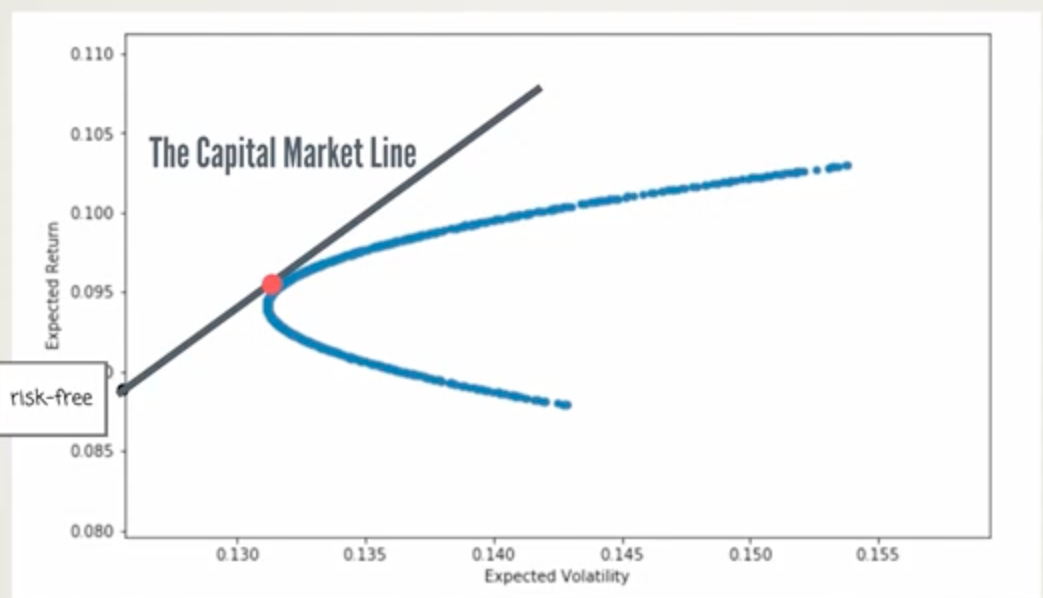

In [99]:
img = Image.open(PATH + 'assets/capital_market_line.png')
display(img)

### Understanding Beta

Beta helps quantify the relationship b/w a security and the market portfolio
- Since the market portfolio contains all assets in the market (from low risk-low return to high risk-high return assets), if there's a recession in an economy, it's reasonable to assume most assets in that market will go down in price, and the market portfolio will have a negative rate of return (ie. -5%). This is systemic risk.

However, certain assets in that portfolio will do better and worse than the market portfolio
- Safer stocks will earn less than the market portfolio when the economy grows, but will also go down less than the market portfolio when it goes down
- Riskier stocks will earn more than the market portfolio when the economy grows, but go down farther when the economy goes down

Enter beta. Beta measures the market risk that cannot be avoided through diversification.

Beta = Cov(stock, market)/Var(market)

The relationship between a stock and the market:
- b=0: no relationship
- b<1: Defensive - will move less than the market
- b=1: Moves in parallel with the market
- b>1: Agressive - will move more than the market

Some companies (like walmart, b=0.09) are less dependent on the economic cycle (as walmart's clients will continue to buy food and household products). Other companies (like Ford, b=1.1) are impacted more significantly as in times of recession, people are unwilling to buy new cars and are willing to postpone such purchases

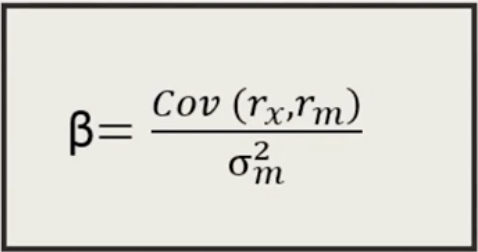

In [100]:
img = Image.open(PATH + 'assets/beta.png')
display(img)

In [101]:
# Beta is usually calculated with data from past 5 years

import numpy as np
import pandas as pd
import yfinance as yf

tickers = ['PG', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='2019-1-1', end='2024-12-31', auto_adjust=False)['Adj Close']

data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^GSPC
Date,,
2019-01-02,77.515785,2510.030029
2019-01-03,76.972275,2447.889893
2019-01-04,78.543327,2531.939941
2019-01-07,78.229118,2549.689941
2019-01-08,78.517838,2574.409912


In [102]:
sec_returns = np.log(data/data.shift(1))
sec_returns.head()

,PG,^GSPC
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.007036,-0.025068
2019-01-04,0.020205,0.033759
2019-01-07,-0.004008,0.006986
2019-01-08,0.003684,0.009649


In [103]:
cov = sec_returns.cov() * 250 # annualized covariance matrix
cov

,PG,^GSPC
PG,0.040704,0.021979
^GSPC,0.021979,0.040565


In [104]:
cov_with_market = cov.iloc[0,1] # bottom left corner of cov matrix
print(cov_with_market)

0.021979443476632807


In [105]:
market_var = sec_returns['^GSPC'].var() * 250
print(market_var)

0.040565446408167505


### Beta:

In [106]:
sec_beta = cov_with_market / market_var
print(sec_beta)

0.5418267373536764


### CAPM Formula

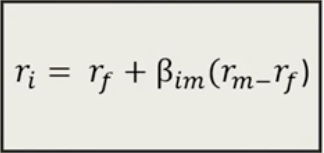

In [107]:
img = Image.open(PATH + 'assets/capm.png')
display(img)

The equity risk premium (ERP) is the extra return that investors demand for choosing to invest in stocks (equities) over risk-free assets (like government bonds). This is given to us by the following formula (recognizable in the CAPM formula) market return - return of a specific asset. Traditionally, this value is between 4.5-5.5%, so 5% is commonly used as a proxy for ERP
ERP = R<sub>m</sub> - R<sub>f</sub>.




A security's expected rate of return is equal to the return of the risk free asset plus beta times (market return minus the risk free return)

To put this into practice, let's calculate PG's Beta:

- To start, let's define the risk free asset as the 10-year US government bond yield of 2.5% as it's the closest thing we actually have to a riskless investment
- Next, we'll use the SP500 to calculate the Beta given the prior formula = 0.54
- Since we know that the ERP is usually around 5%, we can now calculate the CAPM return which would be:
    2.5%+.54(5%)=5.2%

So, when an investor buys PG's shares, they would expect to earn 5.6% as compensation for taking on a riskier investment than the sp500

In [108]:
# Calculating the expected return of PG (CAPM)
sec_expected_return = 0.025 + sec_beta * 0.05
print(sec_expected_return)

0.05209133686768382


### Sharpe Ratio

We know that rational investors want to minimize their risk and hence inest in less volatile securities, so it could be said that a rational investor considers both risk and return. So, they need a measure of risk-adjusted return. Enter the Sharpe ratio:

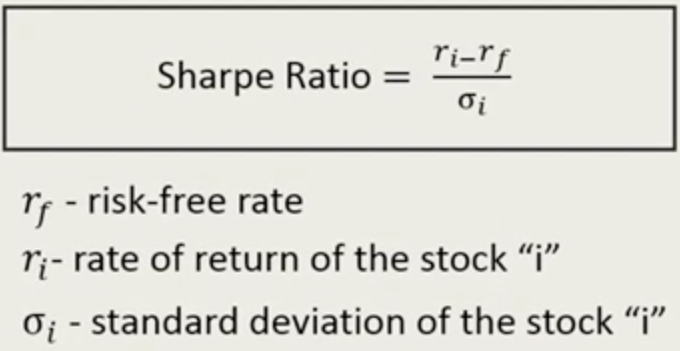

In [109]:
img = Image.open(PATH + 'assets/sharpe_ratio.png')
display(img)

The sharpe ratio allows us to compare:
- Stock A vs Stock B
- Investment Portfolio A vs Investment Portfolio B

In [110]:
sharp_ratio = (sec_expected_return - 0.025) / (sec_returns['PG'].std() * 250 ** 0.5)
print(sharp_ratio)

0.13427940853209774


### Alpha
A measure of how good or bad an investment manager is doing. The standard CAPM setting assumes an alpha equal to 0
- r<sub>i</sub> = a + r<sub>f</sub> + b<sub>im</sub>(r<sub>m</sub>-r<sub>f</sub>)

A good portfolio manager outperforms the market and earns a positive alpha, a poor portfolio manager underperforms the market and earns a negative or zero alpha

How might a good manager do this?
- Vlue Investing: Handpicking successful investments; Long-term investments
- Passive trading: investing in a market index and waiting patiently
- Active trading: Adjusting investment portfolios on a frequent basis
- Arbitrage Investing: Find pricing discrepancies on the market and exploiting these discrepancies in order to make a profit without assuming risk


When it comes to comparing with alpha, we can only compare the alpha of investments with a similar risk profile